In [86]:
import cv2
import imageio
import numpy as np
from matplotlib import pyplot as plt

##################################################Task 1###########################################################

In [79]:
def morphological_operations(url,mode,foreground):
    img = cv2.imread(url,0)
    kernel = np.ones((5,5),np.uint8)
    if foreground == 0:
        ret,img = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
    if mode == 'er':
        #Erosion
        erosion = cv2.erode(img,kernel,iterations = 1)
        plt.imshow(erosion,'gray')
        
    if mode == 'di':
        #Dilation
        dilation = cv2.dilate(img,kernel,iterations = 1)
        plt.imshow(dilation,'gray')

    if mode == 'op':
        #Opening
        opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel,iterations = 3)
        plt.imshow(opening,'gray')
        
    if mode == 'cl':
        #Closing
        opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel,iterations = 3)
        plt.imshow(opening,'gray')

Erosion:

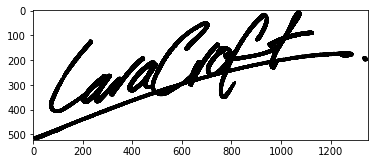

In [80]:
morphological_operations('t1.png','er',1)

Dilation:

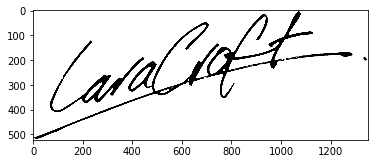

In [81]:
morphological_operations('t1.png','di',1)

Opening:

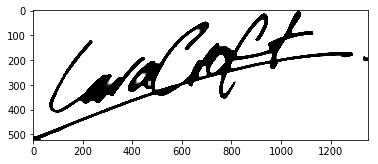

In [82]:
morphological_operations('t1.png','op',1)

Closing:

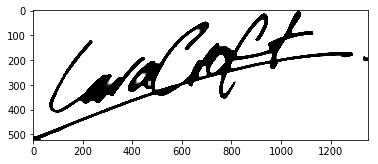

In [83]:
morphological_operations('t1.png','cl',1)

Explanation: the kernel for morphological operator consists 1 for detecting a hit or miss when slided over the image. 
when even only a single '1' in the kernel coincide with a '1' in the image it is a hit otherwise a miss. The cv functions 
are designed to cosider the 1s in the image as the foreground so when eroded, the actual foreground which was black becomes 
dilated due to the erosion of its white background. This effect is oposite in the case of dilation. This the same reason why 
opening is acting like closing and viceversa.

##################################################Task 2###########################################################

In [89]:
def custom(url,foreground):
    images = []
    image = imageio.imread(url)
    plt.imshow(image)
    image = cv2.imread(url)
    image = image[:, :, 0]
    if foreground == 0:
        _,image = cv2.threshold(image,127,255,cv2.THRESH_BINARY_INV)
    images.append(image)
    
    #Dilation
    kernel = np.ones((5,5),np.uint8)
    image = cv2.dilate(image,kernel,iterations = 1)
    images.append(image)
    
    #Erosion
    kernel = np.ones((6,6),np.uint8)
    image = cv2.erode(image,kernel,iterations = 1)
    images.append(image)
    
    plt.figure(figsize=(20,10))
    columns = 5
    for i, image in enumerate(images):
        plt.subplot(len(images) / columns + 1, columns, i + 1)
        plt.imshow(image,'gray')

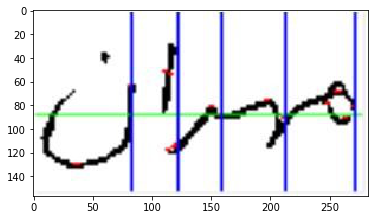

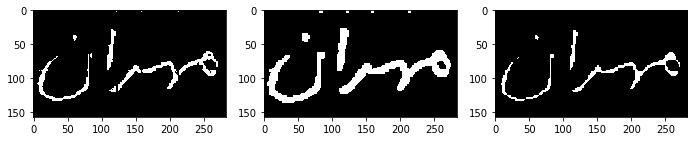

In [90]:
custom('t2.jpg',0)

Problem Faced: Even after binarizing the image the blue vertical lines didnot vanish and were causing problem while dilation and erosion. To remove these lines I fill 0s in the blue channel of the image and then performed binarization. The other problem was, by using the same kernel size for both dilation and erosion left some unnecessary white dots on the top of the 
image. To remove these dots I eroded the image with a kernel of size (6,6) that is 1 unit bigger than the dilation kernel.